In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [6]:
ANALYSIS_DIR = '/home/daryl/analysis'
ANALYSIS_FILE = '{}/nnunet-metrics.pkl'.format(ANALYSIS_DIR)

In [7]:
if os.path.isfile(ANALYSIS_FILE):
    with open(ANALYSIS_FILE, 'rb') as f:
        analysis_d = pickle.load(f)
        print('loaded {} metrics: {}'.format(len(analysis_d), list(analysis_d.keys())))
else:
    print('could not load the analysis file from {}'.format(ANALYSIS_FILE))

loaded 10 metrics: ['140-00', '140-01', '141-00', '141-01', '142-00', '142-01', '143-00', '143-01', '144-00', '144-01']


In [8]:
DSC = []
DSC.append([value['DSC_high'] for key, value in analysis_d.items()])
DSC.append([value['DSC_medium'] for key, value in analysis_d.items()])
DSC.append([value['DSC_low'] for key, value in analysis_d.items()])

In [9]:
spearman = []
spearman.append([value['spearman_correlation'] for key, value in analysis_d.items()])

In [10]:
HD = []
HD.append([value['HD_high'] for key, value in analysis_d.items()])
HD.append([value['HD_medium'] for key, value in analysis_d.items()])
HD.append([value['HD_low'] for key, value in analysis_d.items()])

In [11]:
HD95 = []
HD95.append([value['HD95_high'] for key, value in analysis_d.items()])
HD95.append([value['HD95_medium'] for key, value in analysis_d.items()])
HD95.append([value['HD95_low'] for key, value in analysis_d.items()])

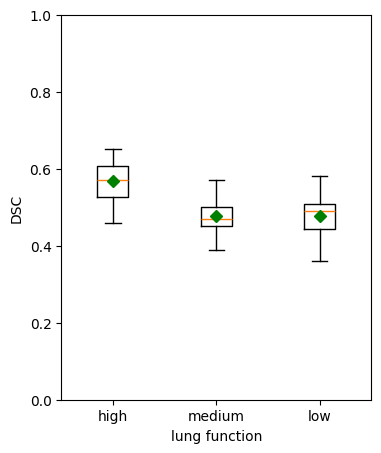

In [19]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(4)

plt.margins(0.06)

red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

bp = ax1.boxplot(DSC, showfliers=True, showmeans=True, meanprops=mean_shape)

ax1.set_xticklabels(['high', 'medium', 'low'])
plt.xlabel('lung function')
plt.ylabel('DSC')
ax1.set_ylim([0, 1])
plt.show()

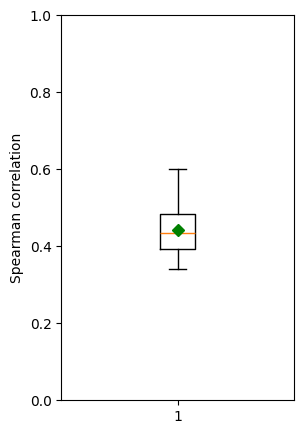

In [18]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(3)

plt.margins(0.06)

red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

bp = ax1.boxplot(spearman, showfliers=True, showmeans=True, meanprops=mean_shape)

# ax1.set_xticklabels(['high', 'medium', 'low'])
# plt.xlabel('lung function')
plt.ylabel('Spearman correlation')
ax1.set_ylim([0, 1])
plt.show()

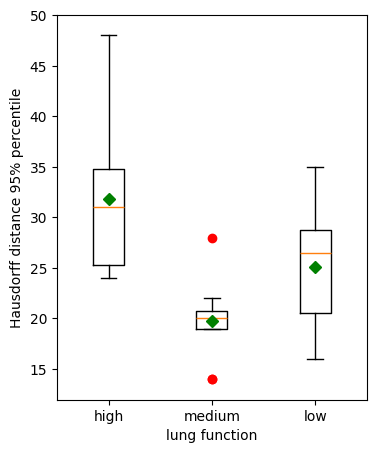

In [14]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(4)

plt.margins(0.06)

red_circle = dict(markerfacecolor='red', markeredgecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

bp = ax1.boxplot(HD95, showfliers=True, showmeans=True, meanprops=mean_shape, flierprops=red_circle)

ax1.set_xticklabels(['high', 'medium', 'low'])
plt.xlabel('lung function')
plt.ylabel('Hausdorff distance 95% percentile')
plt.show()